### Importing Necessary Libraries 

In [1]:
import numpy as np
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings('ignore')

### Reading the data

In [2]:
titanic = pd.read_csv('Titanic-Dataset.csv') 

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dropping the Un-Necessary Columns

In [4]:
unessential_columns = ["PassengerId","Name","Ticket",'Cabin']

data = titanic.drop(columns = unessential_columns)

In [5]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
data.shape

(891, 8)

#### Data Cleaning 

In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
cross_tab = pd.crosstab(data['Sex'], data['Survived'])

cross_tab

Survived,0,1
Sex,,
female,81,233
male,468,109


In [9]:
data = data.dropna(subset=['Embarked'])

In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [11]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Performing Data Visualization

<Axes: xlabel='Age', ylabel='Fare'>

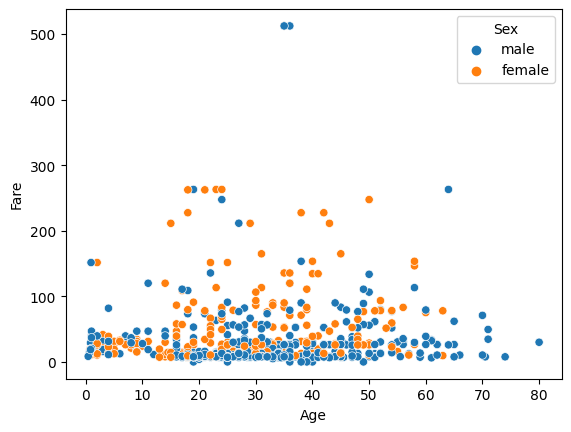

In [12]:
sns.scatterplot(x=data['Age'],y=data['Fare'],hue=data['Sex'])

<Axes: xlabel='Sex', ylabel='Survived'>

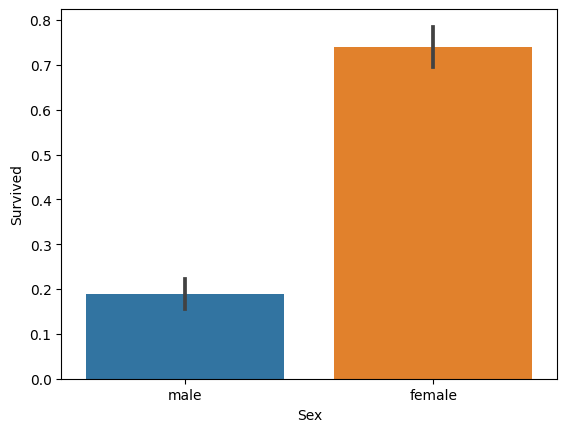

In [13]:
sns.barplot(x=data['Sex'],y=data['Survived'])

<Axes: xlabel='Sex', ylabel='Age'>

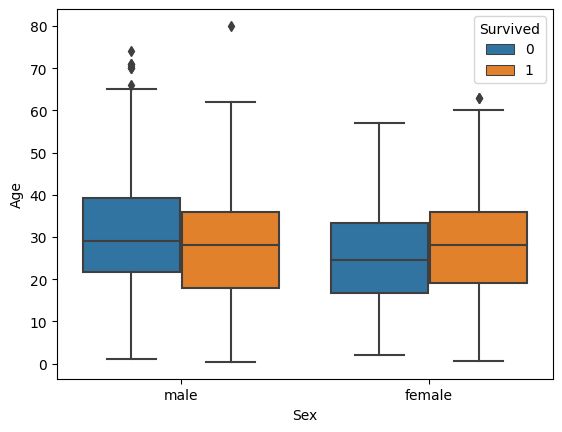

In [14]:
sns.boxplot(x=data['Sex'],y=data['Age'],hue = data['Survived'])

<Axes: xlabel='Age', ylabel='Density'>

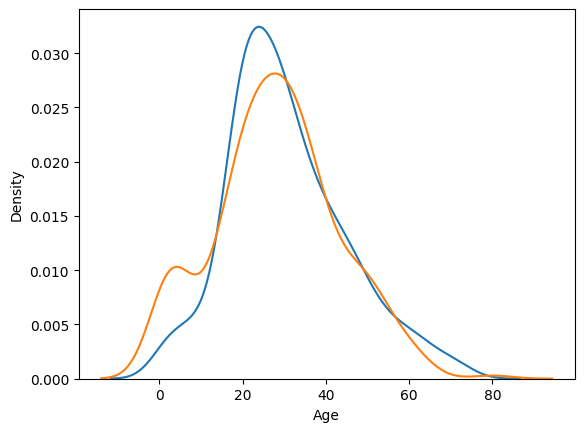

In [15]:
sns.distplot(data[data['Survived']==0]['Age'],hist = False)
sns.distplot(data[data['Survived']==1]['Age'],hist = False)

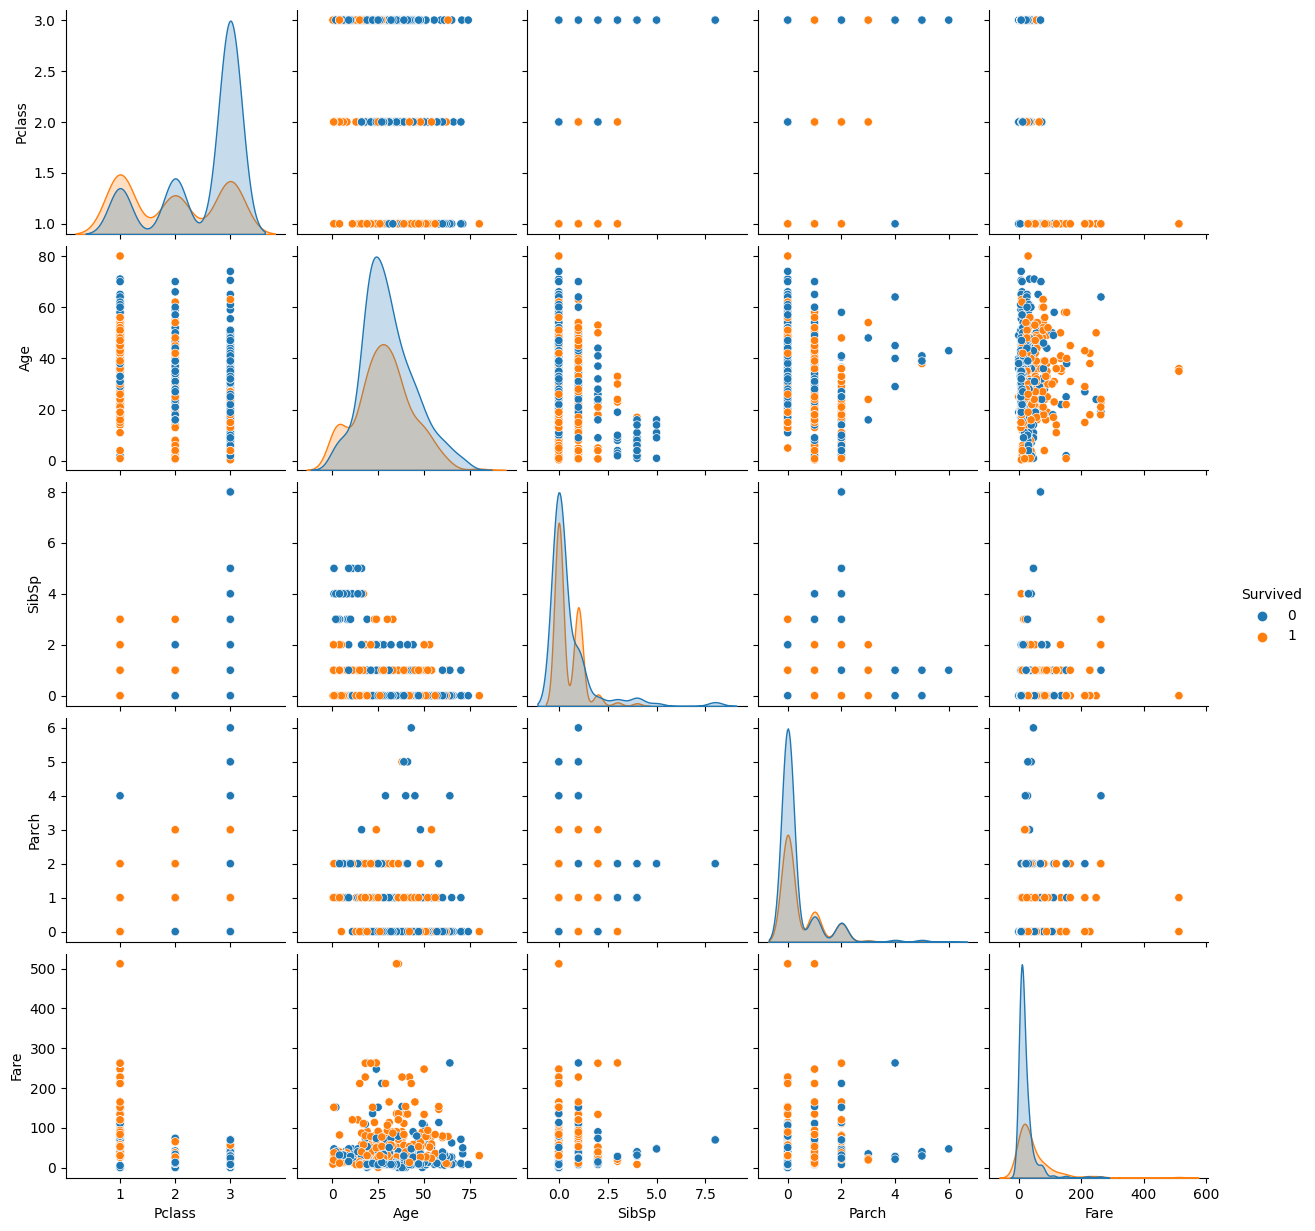

In [16]:
sns.pairplot(data,hue='Survived')

In [17]:
X = data.iloc[:,1:]

In [18]:
y = data.Survived

### SPlitting the data into training and testing 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622 entries, 802 to 419
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    622 non-null    int64  
 1   Sex       622 non-null    object 
 2   Age       495 non-null    float64
 3   SibSp     622 non-null    int64  
 4   Parch     622 non-null    int64  
 5   Fare      622 non-null    float64
 6   Embarked  622 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 38.9+ KB


In [22]:
X_train.dropna(subset=['Embarked'],inplace=True)
X_test.dropna(subset=['Embarked'],inplace=True)

X_train.isnull().sum()

Pclass        0
Sex           0
Age         127
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [23]:
X_train.head(6)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
802,1,male,11.0,1,2,120.0000,S
855,3,female,18.0,0,1,9.3500,S
500,3,male,17.0,0,0,8.6625,S
798,3,male,30.0,0,0,7.2292,C
178,2,male,30.0,0,0,13.0000,S
618,2,female,4.0,2,1,39.0000,S


In [24]:
column_transformer = ColumnTransformer(transformers=[
    ('impute_age',SimpleImputer(strategy = 'median'),[2]),
    ('ohe_sex',OneHotEncoder(sparse=False,drop='first'),[1]),
    ('ohe_embarked',OneHotEncoder(sparse=False,drop='first'),[6])
],remainder= 'passthrough') 



In [27]:
transformed_X_train = column_transformer.fit_transform(X_train)
transformed_X_test = column_transformer.transform(X_test)

In [28]:
master_X_train_df = pd.DataFrame(data=transformed_X_train,columns=['Age','Sex_male','Embarked_C','Embarked_Q','Pclass','SibSp','Parch','Fare'])
master_X_test_df = pd.DataFrame(data=transformed_X_test,columns=['Age','Sex_male','Embarked_C','Embarked_Q','Pclass','SibSp','Parch','Fare'])

In [29]:
master_X_train_df.head() 

,Age,Sex_male,Embarked_C,Embarked_Q,Pclass,SibSp,Parch,Fare
0,11.0,1.0,0.0,1.0,1.0,1.0,2.0,120.0000
1,18.0,0.0,0.0,1.0,3.0,0.0,1.0,9.3500
2,17.0,1.0,0.0,1.0,3.0,0.0,0.0,8.6625
3,30.0,1.0,0.0,0.0,3.0,0.0,0.0,7.2292
4,30.0,1.0,0.0,1.0,2.0,0.0,0.0,13.0000


In [30]:
master_X_train_df.shape


(622, 8)

In [57]:
# here you need to automate the task of updating directly the age values by rounding it by into 1 decimal places 

### Applying  Standard Scaler 

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()

In [33]:
X_train_scaled = sc.fit_transform(master_X_train_df)
X_test_scaled= sc.transform(master_X_test_df)

X_train_scaled.shape

(622, 8)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = LogisticRegression()
forest_model = RandomForestClassifier()


In [36]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [37]:
forest_model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [38]:
predictions_forestmodel = forest_model.predict(X_test_scaled)

In [40]:
predictions_model = model.predict(X_test_scaled)

In [51]:
predictions_model

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

### Checking MOdels Accuracy 

In [42]:
from sklearn.metrics import accuracy_score

In [44]:
results_forestmodel = accuracy_score(y_test,predictions_forestmodel)
results_forestmodel

0.8314606741573034

In [70]:
results_model = accuracy_score(y_test,predictions_model)
results_model

0.8389513108614233

In [45]:
from sklearn.metrics import confusion_matrix

matrix_forestmodel = confusion_matrix(predictions_forestmodel,y_test)
matrix_forestmodel

array([[152,  28],
       [ 17,  70]], dtype=int64)

In [46]:
matrix_model = confusion_matrix(predictions_model,y_test)
matrix_model

array([[156,  30],
       [ 13,  68]], dtype=int64)

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train_scaled,y_train,cv=5,scoring ='accuracy').mean()
# yeah buddy this i s the cross val ue score of our model it will to trintest split 5 times and fit the model and 
# give us the mean accuracy buddy 

0.776541935483871

In [50]:
# i will deploy it buddy 
import pickle 
import os  # Import the os module for handling directories

# Ensure 'models/' directory exists
os.makedirs('models', exist_ok=True)

# Save your objects with specific file names
pickle.dump(column_transformer, open('models/column_transformer.pkl', 'wb'))
pickle.dump(sc, open('models/standard_scaler.pkl', 'wb'))
pickle.dump(model,open('models/classifier.pkl', 'wb'))